In [54]:

from gensim.models.phrases import Phrases, Phraser
import pandas as pd
import nltk
import pymorphy2

import multiprocessing
from gensim.models import word2vec
import numpy as np

In [55]:
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [56]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('vocab_dataset.csv', index_col=0)
data.drop(columns=['date'], inplace=True)


In [60]:
morph = pymorphy2.MorphAnalyzer()
def normalize(doc):
    tokens = nltk.word_tokenize(doc)
    return ' '.join([morph.parse(w)[0].normal_form for w in tokens])

INFO - 18:21:29: Loading dictionaries from C:\Users\tiazz0\anaconda3\lib\site-packages\pymorphy2_dicts_ru\data
INFO - 18:21:29: format: 2.4, revision: 417127, updated: 2020-10-11T15:05:51.070345


In [61]:
data['sents'] = data.review_text.map(lambda x: normalize(x))

In [62]:
data['sents'].iloc[0]

'обязательно посетить большой спасибо хозяйка галлерей творчество позитив ! получить море удовольствие координальный измениться взгляд жизнь !'

In [63]:
sent = [row.split() for row in data['sents']]


In [64]:
phrases = Phrases(sent, min_count=6, progress_per=2)

INFO - 18:25:02: collecting all words and their counts
INFO - 18:25:02: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 18:25:02: PROGRESS: at sentence #2, processed 83 words and 138 word types
INFO - 18:25:02: PROGRESS: at sentence #4, processed 140 words and 226 word types
INFO - 18:25:02: PROGRESS: at sentence #6, processed 366 words and 578 word types
INFO - 18:25:02: PROGRESS: at sentence #8, processed 462 words and 724 word types
INFO - 18:25:02: PROGRESS: at sentence #10, processed 583 words and 898 word types
INFO - 18:25:02: PROGRESS: at sentence #12, processed 779 words and 1165 word types
INFO - 18:25:02: PROGRESS: at sentence #14, processed 969 words and 1397 word types
INFO - 18:25:02: PROGRESS: at sentence #16, processed 1182 words and 1648 word types
INFO - 18:25:02: PROGRESS: at sentence #18, processed 1330 words and 1803 word types
INFO - 18:25:02: PROGRESS: at sentence #20, processed 1549 words and 2068 word types
INFO - 18:25:02: PROGRESS: at sent

In [65]:
bigram = Phraser(phrases)
sentences = bigram[sent]

INFO - 18:25:26: exporting phrases from Phrases<420483 vocab, min_count=6, threshold=10.0, max_vocab_size=40000000>
INFO - 18:25:27: FrozenPhrases lifecycle event {'msg': 'exported FrozenPhrases<2135 phrases, min_count=6, threshold=10.0> from Phrases<420483 vocab, min_count=6, threshold=10.0, max_vocab_size=40000000> in 0.91s', 'datetime': '2023-04-30T18:25:27.709225', 'gensim': '4.3.0', 'python': '3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'created'}


In [66]:
model = word2vec.Word2Vec(vector_size=300, window=6, min_count=5, workers=multiprocessing.cpu_count())

INFO - 18:25:29: Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=300, alpha=0.025>', 'datetime': '2023-04-30T18:25:29.464301', 'gensim': '4.3.0', 'python': '3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'created'}


In [68]:
model.build_vocab(sentences, progress_per=10)

INFO - 18:25:49: collecting all words and their counts
INFO - 18:25:49: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 18:25:49: PROGRESS: at sentence #10, processed 543 words, keeping 338 word types
INFO - 18:25:49: PROGRESS: at sentence #20, processed 1435 words, keeping 703 word types
INFO - 18:25:49: PROGRESS: at sentence #30, processed 2082 words, keeping 938 word types
INFO - 18:25:49: PROGRESS: at sentence #40, processed 2672 words, keeping 1151 word types
INFO - 18:25:49: PROGRESS: at sentence #50, processed 3547 words, keeping 1413 word types
INFO - 18:25:49: PROGRESS: at sentence #60, processed 4159 words, keeping 1598 word types
INFO - 18:25:49: PROGRESS: at sentence #70, processed 5070 words, keeping 1871 word types
INFO - 18:25:49: PROGRESS: at sentence #80, processed 5831 words, keeping 2076 word types
INFO - 18:25:49: PROGRESS: at sentence #90, processed 6587 words, keeping 2279 word types
INFO - 18:25:49: PROGRESS: at sentence #100, processed 7

In [69]:
model.train(sentences, total_examples=model.corpus_count, epochs=30, report_delay=1)

INFO - 18:25:53: Word2Vec lifecycle event {'msg': 'training model with 6 workers on 16523 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=6 shrink_windows=True', 'datetime': '2023-04-30T18:25:53.820575', 'gensim': '4.3.0', 'python': '3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'train'}
INFO - 18:25:54: EPOCH 0 - PROGRESS: at 61.47% examples, 384345 words/s, in_qsize 7, out_qsize 5
INFO - 18:25:55: EPOCH 0: training on 871321 raw words (635395 effective words) took 1.3s, 472094 effective words/s
INFO - 18:25:56: EPOCH 1 - PROGRESS: at 74.28% examples, 426945 words/s, in_qsize 12, out_qsize 0
INFO - 18:25:56: EPOCH 1: training on 871321 raw words (635371 effective words) took 1.3s, 500018 effective words/s
INFO - 18:25:57: EPOCH 2 - PROGRESS: at 66.76% examples, 411895 words/s, in_qsize 11, out_qsize 3
INFO - 18:25:57: EPOCH 2: training on 871321 raw words (

(19062956, 26139630)

In [70]:
for index, word in enumerate(model.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")

word #0/16523 is ,
word #1/16523 is .
word #2/16523 is не
word #3/16523 is !
word #4/16523 is )
word #5/16523 is это
word #6/16523 is -
word #7/16523 is (
word #8/16523 is очень
word #9/16523 is море


In [71]:
model.wv.save_word2vec_format('embeding_weights.w2v')

INFO - 18:26:47: storing 16523x300 projection weights into embeding_weights.w2v


In [72]:
data

,review_text,sents
0,обязательно посетить большое спасибо хозяйке ...,обязательно посетить большой спасибо хозяйка г...
1,приветливый берег приехали детьми семьей ул. ...,приветливый берег приехать ребёнок семья ул . ...
2,"убогие пляжи, мусор грязь убогие пляжи, мусор...","убогий пляж , мусор грязь убогий пляж , мусор ..."
3,"отключение воды каждый день, 2022 год, август...","отключение вода каждый день , 2022 год , авгус..."
4,испорченный отпуск отдыхали геленджике 27.07-...,испортить отпуск отдыхать геленджик 27.07-07.0...
...,...,...
5629,алахадзы — поедем ещё раз! отдыхе каждый ищет...,алахадз — поехать ещё раз ! отдых каждый искат...
5630,нашел сети: должны знать собирающиеся отдохну...,найти сеть : должный знать собираться отдохнут...
5631,абхазия — прекрасная страна! сколько почитала...,абхазия — прекрасный страна ! сколько почитать...
5632,абхазии абхазского остался воздух... долго бе...,абхазия абхазский остаться воздух ... долго бе...


In [81]:
model.wv.most_similar('отдых')

[('отпуск', 0.621656060218811),
 ('семейный_отдых', 0.5240064263343811),
 ('спокойный_отдых', 0.509563148021698),
 ('отдохнуть', 0.47849854826927185),
 ('поездка', 0.42108115553855896),
 ('черноморский_побережье', 0.3859434723854065),
 ('полноценный_отдых', 0.3853902220726013),
 ('пребывание', 0.37313392758369446),
 ('хотеть_отдохнуть', 0.3691297769546509),
 ('комфорт', 0.35443806648254395)]

In [76]:
data = pd.read_csv('dataset.csv', index_col=0)
data.drop(columns=['date'], inplace=True)
data['sents'] = data.review_text.map(lambda x: normalize(x))


In [80]:
data[['sents', 'mark']].to_csv('dataset_mor.csv')

<Axes: >

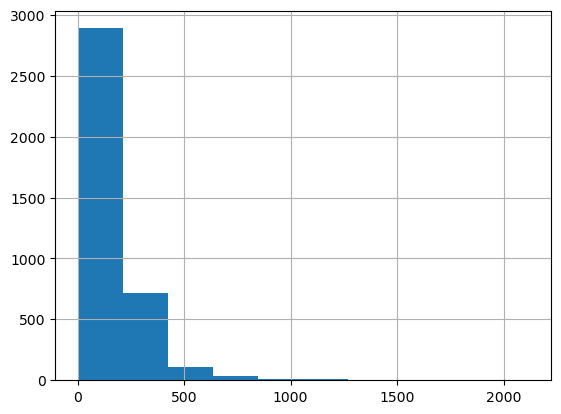

In [79]:
data['tokens'] = data['sents'].map(lambda x: x.split())
data['tokens'].map(lambda x: len(x)).hist()